              precision    recall  f1-score   support

           0       0.29      0.46      0.35     10682
           1       0.48      0.55      0.51     19224
           2       0.60      0.44      0.50     13631
           3       0.16      0.04      0.06      4912
           4       0.51      0.05      0.09       811
           5       0.06      0.02      0.03      1720
           6       0.17      0.24      0.20      2822
           7       0.06      0.02      0.03       935

    accuracy                           0.41     54737
   macro avg       0.29      0.23      0.22     54737
weighted avg       0.41      0.41      0.39     54737



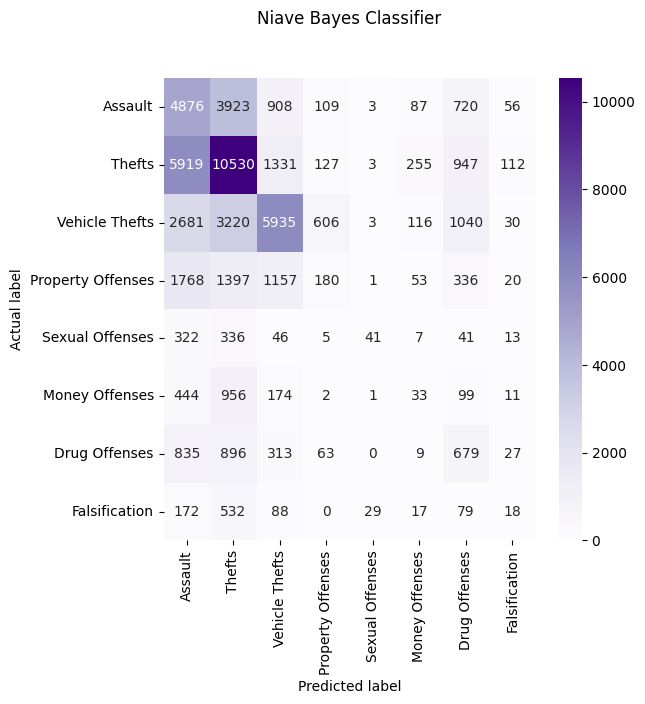

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import torch
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import RocCurveDisplay


dataset_path = 'df8.csv'
df = pd.read_csv(dataset_path)

from sklearn.preprocessing import StandardScaler, LabelEncoder

device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')

df.head()

df = df.drop(columns=['HIGHEST_NIBRS_CODE', 'HIGHEST_NIBRS_DESCRIPTION', 'Violent-Crime'])

crime_type = df.pop('CRIME_TYPE')
y = df.pop('CRIME_TYPE_MAP').values
x = StandardScaler().fit_transform(df.values)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=69)

classifier = GaussianNB()
classifier.fit(x_train, y_train)

# means = classifier.theta_
# variances = classifier.sigma_
# feature_importance = np.abs(means)

y_pred = classifier.predict(x_test)
report = classification_report(y_test, y_pred)
cnf_matrix = confusion_matrix(y_test, y_pred)
#print(cnf_matrix)

class_names = ['Assault','Thefts','Vehicle Thefts','Property Offenses','Sexual Offenses','Money Offenses','Drug Offenses','Falsification']


# create heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,cmap='Purples',fmt='g', xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position("top")
tick_marks = np.arange(len(class_names))
plt.title('Niave Bayes Classifier' , y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print(report)